## Evaluación de los resultados obtenidos

En primer lugar evaluaremos los resultados obtenidos tras 30 ejecuciones del videojuego en cada algoritmo.
- Se evaluará si los resultados siguen una distribución estadística normal haciendo uso del test de Kolmogorov Smirov.
- Dependiendo de si siguen una distribución normal o no, entonces procederemos a realizar test ANOVA o Wilcoxon. 

#### Evaluación de la distribución que siguen los resultados de las puntuaciones.

In [1]:
from  scipy.stats import ks_2samp, mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(file):
    with open(file, 'r') as f:
        r = f.readline()
    ls = []
    data = r.strip().split(',')
    [ls.append(int(float(d))) for d in data]
    return ls

In [ ]:
read_file('DDQN/models/ddqn/total_scores.csv')

In [3]:
def data_test(data1, data2, show=True):
    #En primer lugar se deberá comprobar si los datos siguen una distribución normal o no.
    normal1 = normal_distribution(data1, show)
    normal2 = normal_distribution(data2, show)
    #Si no siguen una distribución normal, entonces realizamos la prueba de wilcoxon para ver si existen diferencias significantes entre los dos datos de muestra
    if not normal1 or normal2:
       res = mannwhitneyu(data1, data2) #Como el valor p-value no se acerca a cero, se puede decir que los conjuntos de datos no tienen mayor prob de tener valores superiores a los de la otra muestra.
        #No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).
    if res.pvalue > 0.1: #La probabilidad de que las medianas sean parecidas
        print("No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).")
    else:
        print("Existen diferencias significativas en los datos de ambas poblaciones.")


In [4]:
def show(data, normal_numbers):
    print('Los datos de entrada son los siguientes: ', data)
    plt.figure(figsize=(9,6))
    plt.plot(data, '.')
    
    #Escalado de los datos para mostrar el histograma comparado a datos que siguen una distribución normal
    sorted_data = np.sort(data, axis=0)
    scaled_data = (sorted_data - sorted_data.mean()) / sorted_data.std()  #Tipificamos ya que la función kstest usa la distribcion normal estandar con media=0 y std = 1
    print('Datos escalados con media=0 y desviación = 1: ', scaled_data)

    #Definimos datos aleatorios del mismo tamaño que los nuestros para poder realizar una representación gráfica
    plt.figure(figsize=(9,6))
    plt.hist([scaled_data, normal_numbers], label = ['scaled_data', 'normal'])
    plt.legend(loc = 'best')


In [5]:
def normal_distribution(data, show_data = True):

    #Definimos datos aleatorios que siguen una distribución normal del mismo tamaño que los nuestros para poder realizar una representación gráfica
    normal_numbers = np.random.normal(loc=0, scale=1, size=np.size(data))
    normal_numbers = np.sort(normal_numbers)
    if show_data:
        show(data, normal_numbers)
    #Comprobamos si nuestros datos siguen la misma distribución que los otros (normal)
    res = ks_2samp(data, normal_numbers) #Rechazamos la hipotesis nula, ya que pvalue es muy cercano a 0. Lo cual, por teoría, hace que rechacemos H0 y vemos que nuestros datos, no siguen una distribución normal.
    #Hemos definido un valor de alfa de 0.05 para poder evaluar el p-value
    if res.pvalue < 0.05: #Se rechaza la hipótesis nula, es un número muy cercano a cero
        print('Los datos no siguen una distribución normal.')
        return False
    else:
        print('Los datos siguen una distribución normal.')
        return True   

In [32]:
def get_mean_max_min(data):
    #Mean of data
    mean = np.mean(data)
    print("La media de los resultados es: ", mean)

    #Max result obtained
    max_ = np.max(data)
    print("El valor máximo de los resultados es: ", max_)

    #Min result obtained
    min_ = np.min(data)
    print("El valor mínimo de los resultados es: ", min_)


### Datos obtenidos para ser evaluados
En primer lugar evaluaremos los datos del algoritmo DQN:

In [6]:
DQN_SCORES_PATH = 'DDQN/models/dqn/total_scores.csv'
DQN_REWARDS_PATH = 'DDQN/models/dqn/total_rewards.csv'
DQN_LIFETIME_PATH = 'DDQN/models/dqn/total_life_times.csv'

In [7]:
#Vector con los resultados obtenidos.
#ALGORTIMO - DQN.
dqn_scores = read_file(DQN_SCORES_PATH)
dqn_rewards = read_file(DQN_REWARDS_PATH)
dqn_lifetime = read_file(DQN_LIFETIME_PATH)

In [33]:
#Valores medios, máximos y mínimos de las puntuaciones
get_mean_max_min(dqn_scores)

La media de los resultados es:  190.0
El valor máximo de los resultados es:  900
El valor mínimo de los resultados es:  0


In [34]:
#Valores medios, máximos y mínimos de las recompensas
get_mean_max_min(dqn_rewards)

La media de los resultados es:  584.3
El valor máximo de los resultados es:  1391
El valor mínimo de los resultados es:  227


In [35]:
#Valores medios, máximos y mínimos de los tiempos de vida
get_mean_max_min(dqn_lifetime)

La media de los resultados es:  69.63333333333334
El valor máximo de los resultados es:  312
El valor mínimo de los resultados es:  5


Los datos de entrada son los siguientes:  [200, 500, 0, 200, 400, 300, 400, 200, 0, 0, 200, 100, 0, 0, 900, 0, 600, 200, 200, 100, 0, 200, 100, 200, 100, 200, 0, 300, 100, 0]
Datos escalados con media=0 y desviación = 1:  [-0.93192508 -0.93192508 -0.93192508 -0.93192508 -0.93192508 -0.93192508
 -0.93192508 -0.93192508 -0.93192508 -0.4414382  -0.4414382  -0.4414382
 -0.4414382  -0.4414382   0.04904869  0.04904869  0.04904869  0.04904869
  0.04904869  0.04904869  0.04904869  0.04904869  0.04904869  0.53953558
  0.53953558  1.03002246  1.03002246  1.52050935  2.01099623  3.48245689]
Los datos no siguen una distribución normal.


False

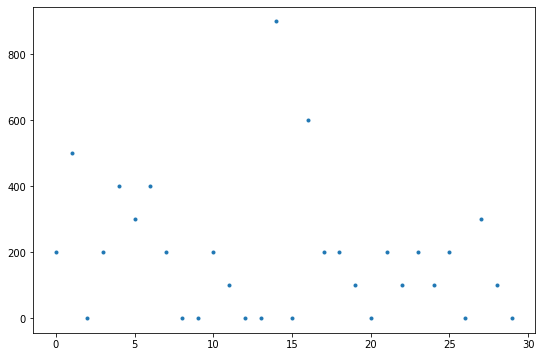

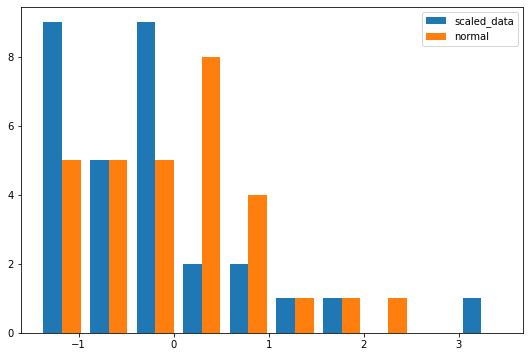

In [92]:
#Primero evaluamos si los datos siguen o no una distribución normal
normal_distribution(dqn_scores)

Los datos de entrada son los siguientes:  [779, 686, 242, 765, 1181, 875, 1087, 246, 592, 227, 233, 620, 587, 554, 1186, 243, 760, 611, 244, 733, 235, 636, 618, 231, 1391, 240, 253, 613, 625, 236]
Datos escalados con media=0 y desviación = 1:  [-1.10079309 -1.08846963 -1.0823079  -1.07614617 -1.0730653  -1.06074184
 -1.05458011 -1.05149925 -1.04841838 -1.04225665 -1.0206906  -0.09335021
  0.00831834  0.02372266  0.0822591   0.08842083  0.10382515  0.10998688
  0.12539121  0.15928072  0.31332398  0.45812464  0.54130799  0.55671232
  0.59984443  0.89560748  1.54875087  1.83835219  1.85375651  2.48533385]
Los datos no siguen una distribución normal.


False

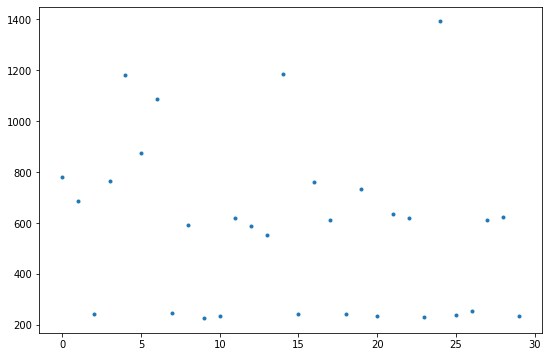

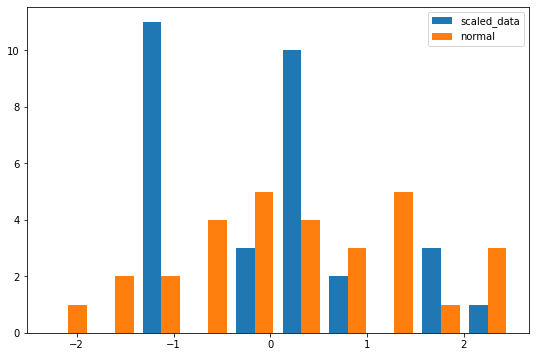

In [94]:
#Evaluación de las recompensas
normal_distribution(dqn_rewards)

Los datos de entrada son los siguientes:  [41, 157, 6, 78, 186, 192, 289, 6, 34, 8, 7, 19, 28, 46, 271, 7, 312, 27, 7, 28, 7, 31, 18, 7, 71, 7, 5, 170, 17, 7]
Datos escalados con media=0 y desviación = 1:  [-0.70150792 -0.69065427 -0.69065427 -0.67980061 -0.67980061 -0.67980061
 -0.67980061 -0.67980061 -0.67980061 -0.67980061 -0.66894696 -0.57126406
 -0.5604104  -0.54955675 -0.4627275  -0.45187385 -0.45187385 -0.41931288
 -0.38675192 -0.31077633 -0.25650805  0.01483333  0.09080892  0.94824769
  1.0893452   1.26300369  1.32812562  2.18556439  2.38093019  2.63056426]
Los datos no siguen una distribución normal.


False

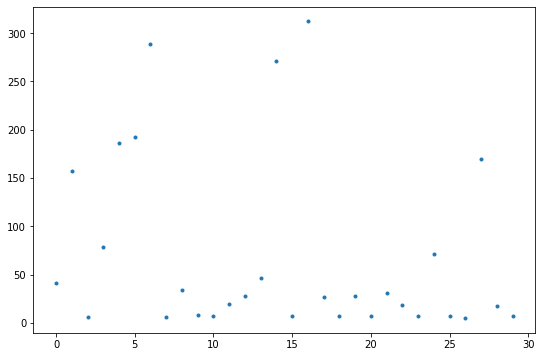

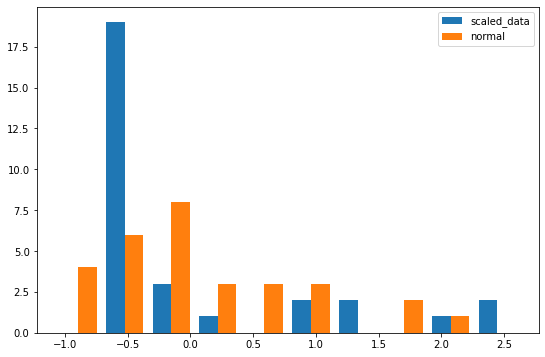

In [95]:
#Evaluación del tiempo de vida
normal_distribution(dqn_lifetime)

Ahora se evaluarán los resultados del algoritmo DDQN:

In [19]:
DDQN_SCORES_PATH = 'DDQN/models/ddqn/total_scores.csv'
DDQN_REWARDS_PATH = 'DDQN/models/ddqn/total_rewards.csv'
DDQN_LIFETIME_PATH = 'DDQN/models/ddqn/total_life_times.csv'

In [20]:
#Ahora se evaluará DDQN
ddqn_scores = read_file(DDQN_SCORES_PATH)
ddqn_rewards = read_file(DDQN_REWARDS_PATH)
ddqn_lifetime = read_file(DDQN_LIFETIME_PATH)

In [36]:
#Valores medios, máximos y mínimos de las puntuaciones DDQN
get_mean_max_min(ddqn_scores)

La media de los resultados es:  203.33333333333334
El valor máximo de los resultados es:  600
El valor mínimo de los resultados es:  0


In [37]:
#Valores medios, máximos y mínimos de las recompensas DDQN
get_mean_max_min(ddqn_rewards)

La media de los resultados es:  634.4
El valor máximo de los resultados es:  1501
El valor mínimo de los resultados es:  229


In [38]:
#Valores medios, máximos y mínimos de los tiempos de vida DDQN
get_mean_max_min(ddqn_lifetime)

La media de los resultados es:  71.4
El valor máximo de los resultados es:  400
El valor mínimo de los resultados es:  6


Los datos de entrada son los siguientes:  [0, 0, 200, 0, 0, 300, 0, 400, 200, 200, 0, 0, 200, 200, 500, 600, 300, 0, 400, 400, 100, 200, 200, 300, 200, 0, 100, 400, 200, 500]
Datos escalados con media=0 y desviación = 1:  [-1.16769136 -1.16769136 -1.16769136 -1.16769136 -1.16769136 -1.16769136
 -1.16769136 -1.16769136 -1.16769136 -0.59341692 -0.59341692 -0.01914248
 -0.01914248 -0.01914248 -0.01914248 -0.01914248 -0.01914248 -0.01914248
 -0.01914248 -0.01914248  0.55513196  0.55513196  0.55513196  1.1294064
  1.1294064   1.1294064   1.1294064   1.70368084  1.70368084  2.27795528]
Los datos no siguen una distribución normal.


False

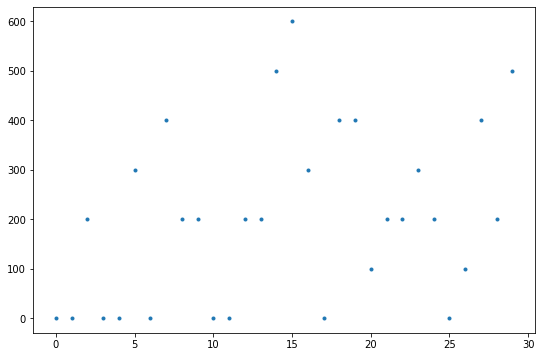

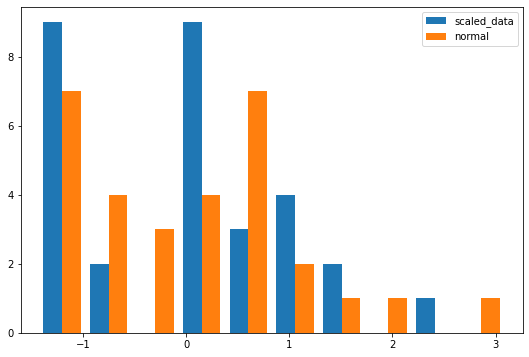

In [96]:
#Evaluación de las puntuaciones
normal_distribution(ddqn_scores)

Los datos de entrada son los siguientes:  [0, 0, 200, 0, 0, 300, 0, 400, 200, 200, 0, 0, 200, 200, 500, 600, 300, 0, 400, 400, 100, 200, 200, 300, 200, 0, 100, 400, 200, 500]
Datos escalados con media=0 y desviación = 1:  [-1.16769136 -1.16769136 -1.16769136 -1.16769136 -1.16769136 -1.16769136
 -1.16769136 -1.16769136 -1.16769136 -0.59341692 -0.59341692 -0.01914248
 -0.01914248 -0.01914248 -0.01914248 -0.01914248 -0.01914248 -0.01914248
 -0.01914248 -0.01914248  0.55513196  0.55513196  0.55513196  1.1294064
  1.1294064   1.1294064   1.1294064   1.70368084  1.70368084  2.27795528]
Los datos no siguen una distribución normal.


False

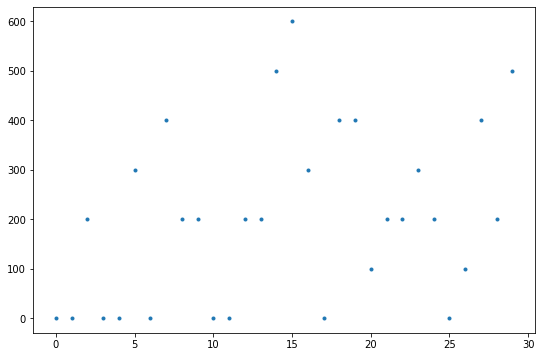

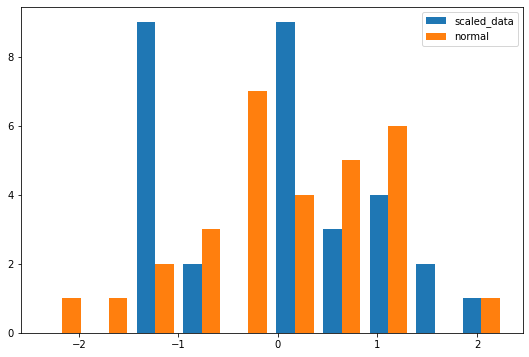

In [97]:
#Evaluación de la recompensa obtenida en cada juego
normal_distribution(ddqn_scores)

Los datos de entrada son los siguientes:  [605, 249, 623, 243, 619, 1308, 638, 1501, 250, 788, 235, 237, 229, 717, 854, 938, 782, 243, 610, 902, 617, 250, 689, 695, 1350, 230, 634, 267, 799, 930]
Datos escalados con media=0 y desviación = 1:  [-1.16463176e+00 -1.16175896e+00 -1.14739498e+00 -1.14164938e+00
 -1.12441260e+00 -1.12441260e+00 -1.10717582e+00 -1.10430303e+00
 -1.10430303e+00 -1.05546548e+00 -8.44602210e-02 -7.00962379e-02
 -4.99866614e-02 -4.42410682e-02 -3.27498816e-02 -1.14911865e-03
  1.03420679e-02  1.56854696e-01  1.74091476e-01  2.37293002e-01
  4.24024783e-01  4.41261563e-01  4.72862326e-01  6.30866141e-01
  7.68760379e-01  8.49198685e-01  8.72181058e-01  1.93511581e+00
  2.05577327e+00  2.48956556e+00]
Los datos no siguen una distribución normal.


False

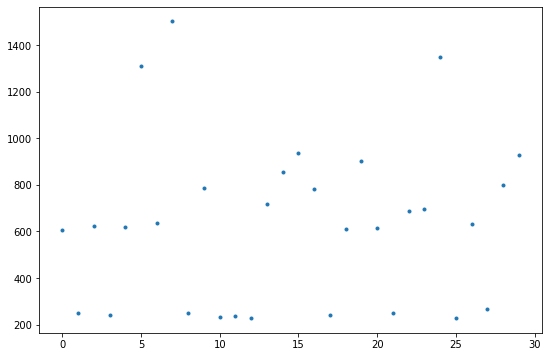

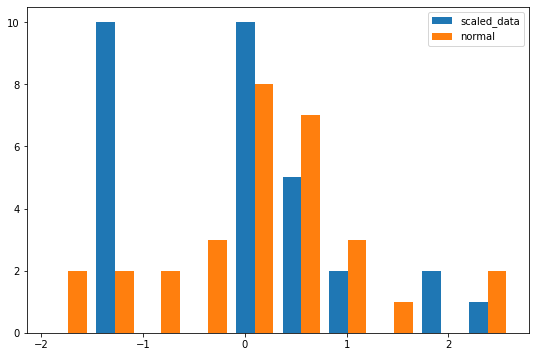

In [98]:
#Evaluación de las recompensas
normal_distribution(ddqn_rewards)

Los datos de entrada son los siguientes:  [29, 6, 20, 6, 21, 40, 29, 244, 6, 55, 7, 6, 7, 47, 219, 134, 61, 6, 137, 168, 31, 6, 93, 95, 33, 7, 33, 400, 44, 152]
Datos escalados con media=0 y desviación = 1:  [-0.73302726 -0.73302726 -0.73302726 -0.73302726 -0.73302726 -0.73302726
 -0.72181889 -0.72181889 -0.72181889 -0.57611011 -0.56490174 -0.4752348
 -0.4752348  -0.45281806 -0.43040132 -0.43040132 -0.35194275 -0.30710928
 -0.27348418 -0.18381723 -0.11656703  0.24210075  0.26451748  0.70164383
  0.73526893  0.90339445  1.08272833  1.65435509  1.93456429  3.68306967]
Los datos no siguen una distribución normal.


False

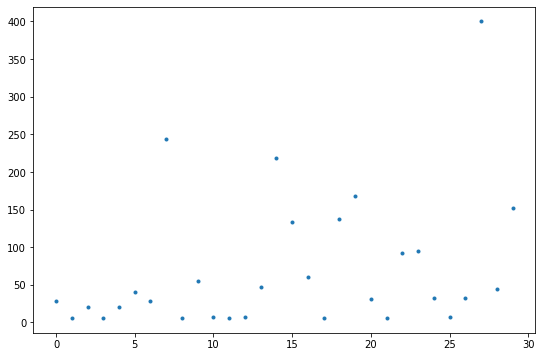

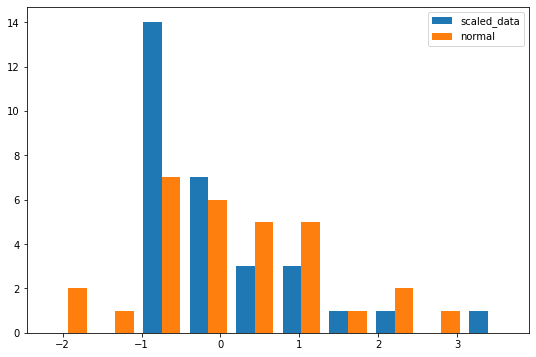

In [99]:
#Evaluación del tiempo de vida
normal_distribution(ddqn_lifetime)

Finalmente se evaluarán los resultados del algoritmo PPO:

In [27]:
PPO_SCORES_PATH = 'PPO/total_scores.csv'
PPO_REWARDS_PATH = 'PPO/total_rewards.csv'
PPO_LIFETIME_PATH = 'PPO/total_life_times.csv'

In [28]:
ppo_scores = read_file(PPO_SCORES_PATH)
ppo_rewards = read_file(PPO_REWARDS_PATH)
ppo_lifetime = read_file(PPO_LIFETIME_PATH)

In [39]:
#Valores medios, máximos y mínimos de las puntuaciones PPO
get_mean_max_min(ppo_scores)

La media de los resultados es:  306.6666666666667
El valor máximo de los resultados es:  1200
El valor mínimo de los resultados es:  0


In [40]:
#Valores medios, máximos y mínimos de las recompensas PPO
get_mean_max_min(ppo_rewards)

La media de los resultados es:  1749.0
El valor máximo de los resultados es:  3383
El valor mínimo de los resultados es:  732


In [41]:
#Valores medios, máximos y mínimos de los tiempos de vida PPO
get_mean_max_min(ppo_lifetime)

La media de los resultados es:  13.733333333333333
El valor máximo de los resultados es:  41
El valor mínimo de los resultados es:  3


In [100]:
#Evaluación de las puntuaciones
normal_distribution(ppo_scores, show_data=False)

#Evaluación de las recompensas obtenidas
normal_distribution(ppo_rewards, show_data=False)

#Evaluación del tiempo de vida
normal_distribution(ppo_lifetime, show_data=False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.


False

#### Ahora, se evaluará conjuntamente los datos para realizar una comparación general entre ellos.


In [112]:
data_test(dqn_scores, ddqn_scores, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).


In [113]:
data_test(dqn_scores, ppo_scores, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).


In [115]:
data_test(ddqn_scores, ppo_scores, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).


Ahora se evaluarán las recompensas obtenidas

In [116]:
data_test(dqn_rewards, ddqn_rewards, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).


In [117]:
data_test(dqn_rewards, ppo_rewards, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
Existen diferencias significativas en los datos de ambas poblaciones.


In [119]:
data_test(ddqn_rewards, ppo_rewards, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
Existen diferencias significativas en los datos de ambas poblaciones.


Ahora se evalúa el tiempo de vida vivo

In [121]:
data_test(dqn_lifetime, ddqn_lifetime, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
No hay diferencias significantes entre ambas poblaciones (según los datos de muestra).


In [122]:
data_test(dqn_lifetime, ppo_lifetime, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
Existen diferencias significativas en los datos de ambas poblaciones.


In [124]:
data_test(ddqn_lifetime, ppo_lifetime, False)

Los datos no siguen una distribución normal.
Los datos no siguen una distribución normal.
Existen diferencias significativas en los datos de ambas poblaciones.
